# $(T)\ Two\ Body\ Cases$

## TESTBODY LIMIT REGIME $\quad m_1 \ll m_2$

### TESTBODY LIMIT BOUND

Old case test

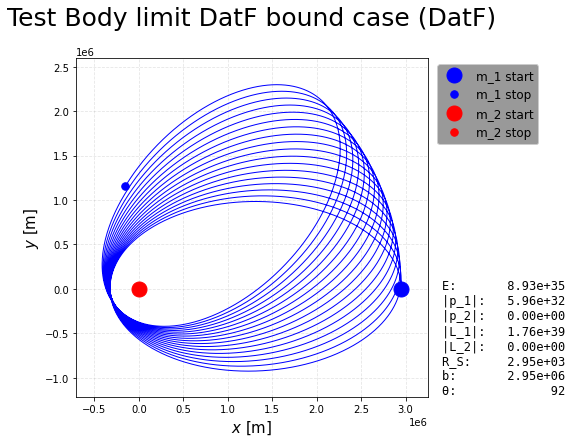

In [1]:
%run ./Functions_EIH.ipynb

m_1 = 1e-4*M_sun
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([1000, 0.])*R_S
x_2 = np.array([0.,   0.])*R_S
v_1 = np.array([0., 0.01])*c
v_2 = np.array([0.,    0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 2027500*R_S/c, dt=100*R_S/c, α=1, mode = 'DatF')
# pos1, pos2, pos_CM, parameters accs = run_model(s, t_max = 2027500*R_S/c, dt=100*R_S/c, α=1, DatF = True)
orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Test Body limit DatF bound case (DatF)')

# E, p_1_len, p_2_len, L_1_len, L_2_len, R_S, b = parameters
# # print(f'E = {E:.2e} J,', f'|p_1| = {p_1_len:.2e} kg m/s,', f'|p_2| = {p_2_len:.2e} kg m/s,', f'|L_1| = {L_1_len:.2e} kg m^2/s,', f'|L_2| = {L_2_len:.2e} kg m^2/s,', f'R_S = {R_S:.2e} m,', f'b = {b:.2e} m,')

# 2.1s

EIH α check $\ \downarrow$

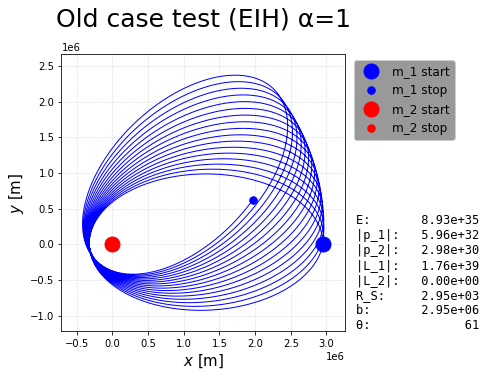

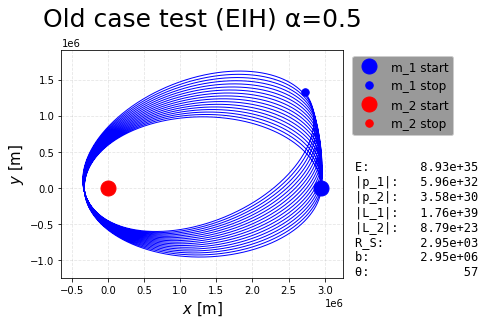

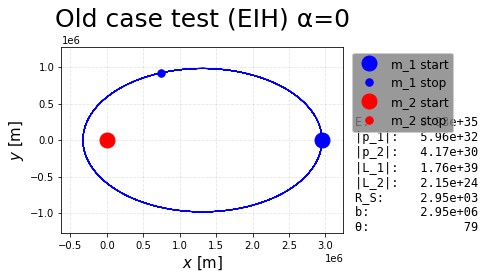

In [2]:
%run ./Functions_EIH.ipynb

αs = [1,0.5,0]
for i in αs:
    pos1, pos2, pos_CM, parameters = run_model(s, t_max = 2027500*R_S/c, dt=20*R_S/c, mode = 'EIH', α = i)
    # pos1, pos2, pos_CM, parameters, accs = run_model(s, t_max = 2027500*R_S/c, dt=100*R_S/c, EIH=True)
    orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename=f'Old case test (EIH) α={i}', figsize=(7,7), show=True)

# dt STABILIZED at 20*R_S/c
# ~30s

## Checking whether GR reduces to CM
We check by checking whether the parameters of the ellipse of the first round trip in the GR case mathces the ellipse of the CM case.

It should be said that throughout this we assume the following:
1. The motion of the first round trip is an ellipse in both cases.
2. That the line going through the points $(x_1, max(y))$ and $(x_2, min(y))$ is perfectly vertical (that is $x_1 = x_2$).
3. That the line going through the points $(max(x), y_1)$ and $(min(x), y_2)$ is perfectly horizontal (that is $y_1 = y_2$).

We check the semi-major and -minor axis $a$ and $b$ by finding the distances between the points mentioned above

$$a = \frac{|| (x_1, \max(y)) - (x_2, \min(y)) ||}{2},$$

and similarly for the semi-minor axis $b$

$$b = \frac{|| (\max(x), y_1) - (\min(x), y_2) ||}{2}.$$

δa = 0.61303, δb = 9.97285


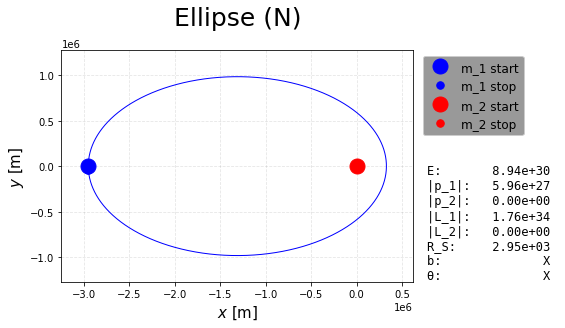

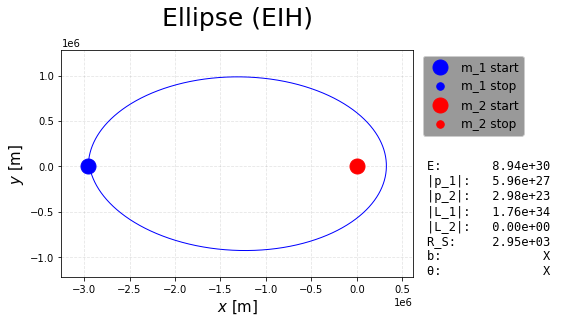

In [3]:
%run ./Functions_EIH.ipynb

# CM Bound orbital, faraway starting pos
m_1 = 1e-9*M_sun
m_2 = M_sun

R_S = findR_S(m_1, m_2)

x_1 = np.array([-1000, 0])*R_S
x_2 = np.array([0,     0])*R_S
v_1 = np.array([0,  0.01])*c
v_2 = np.array([0,     0])*c

s = x_1, x_2, v_1, v_2, m_1, m_2

pos1N, pos2N, pos_CMN, parameters = run_model(s, t_max = 115000*R_S/c, dt=1*R_S/c, mode = 'N')
parameters[6], parameters[7] = 'X', 'X'
orbPlot1 = orbPlotter(pos1N, pos2N, pos_CMN, parameters, filename = 'Ellipse (N)', show = True)

# # GR bound orbital, faraway starting pos, one round
pos1EIH, pos2EIH, pos_CMEIH, parameters = run_model(s, t_max = 113000*R_S/c, dt=1*R_S/c, mode = 'EIH')
parameters[6], parameters[7] = 'X', 'X'
orbPlot1 = orbPlotter(pos1EIH, pos2EIH, pos_CMEIH, parameters, filename = 'Ellipse (EIH)', show = True)

# Find the dimensions of the ellipse for both cases
δxN = np.abs(max(pos1N[0]) - min(pos1N[0]))
δyN = np.abs(max(pos1N[1]) - min(pos1N[1]))
δxEIH = np.abs(max(pos1EIH[0]) - min(pos1EIH[0]))
δyEIH = np.abs(max(pos1EIH[1]) - min(pos1EIH[1]))

# Find a & b for N case and normalize wrt. R_S
a_N = max(δxN/2, δyN/2)/R_S
b_N = min(δxN/2, δyN/2)/R_S

# Find a & b for EIH case and normalize wrt. R_S
a_EIH = max(δxEIH/2, δyEIH/2)/R_S
b_EIH = min(δxEIH/2, δyEIH/2)/R_S

# Find how much the differ 
δa = np.abs(a_N - a_EIH)
δb = np.abs(b_N - b_EIH)

print(f'δa = {δa:.5f}, δb = {δb:.5f}')

# ~15s

The results of $\delta a \sim 0.5 \, R_S$ and $\delta b \sim 10 \, R_S$ are tiny compared to the size of the entire ellipse which is of the order $\sim 1000 \, R_S$. We suspect that the magnitude of $\delta b$ compared to $\delta a$ could be caused by the precession of the orbit in GR.

## Checking the precession
First we find the analytical value for the precession angle. The precession in our units is given by
    $$\Delta \phi = \frac{6 \pi G M}{\left( 1 - e^2 \right) a c^2} \quad \longrightarrow \quad \frac{3 \pi}{\left(1 - e^2 \right) \tilde a}$$
where $e = \sqrt{1 - b^2/a^2}$ is the eccentricity of the motion. This formula is calculated from the method of Post-Newtonian corrections, and thus the $\tilde a$ here is actually the $\tilde a$ from the Classical case. Let's take the case from before

In [4]:
# Taking the parameters of the motion from the CM case above
e = np.sqrt(1 - b_N**2/a_N**2)

# Calculating the analytically predicted value of the precession angle (in radians), and how many times it divides 2π radians.
Δφr = 3*np.pi/( (1 - e**2) * a_N)
angDiv = 2*np.pi/Δφr

Δφa = Δφr*360/(2*np.pi) #Convert to angles
print(f'Δφ (in radians) = {Δφr:.3f}, Δφ (in angles) = {Δφa:.3f}, Circle divisions = {angDiv:.0f}')

Δφ (in radians) = 0.047, Δφ (in angles) = 2.700, Circle divisions = 133


Now, to check whether this fits with our numerical model first we generate the GR scenario from the same boundary conditions and let it run for a full 360. Then we compile the distance to the origin at every point along the motion into an array. Then we use a function to find all the local extrema in the distances array. The total number of peaks is then the total number of orbitals in a full 360. We then compare this result to the number of circle divisions from the analytical solution.

In [5]:
%run ./Functions_EIH.ipynb

# m_1 = 1e-9*M_sun
# m_2 = M_sun

# R_S = findR_S(m_1, m_2)

# x_1 = np.array([-1000, 0])*R_S
# x_2 = np.array([0,     0])*R_S
# v_1 = np.array([0,  0.01])*c
# v_2 = np.array([0,     0])*c

# s = x_1, x_2, v_1, v_2, m_1, m_2

# # GR bound orbital, faraway starting pos, full 360
# pos1EIH, pos2EIH, pos_CMEIH, parametersEIH = run_model(s, t_max = 2e7*R_S/c, dt=0.1*R_S/c, mode = 'EIH')
# parameters[6], parameters[7] = 'X', 'X'

# # dt
# # ~25min

# FullCircData = np.array([pos1EIH[0][0:-1:1000], pos1EIH[1][0:-1:1000], pos2EIH[0][0:-1:1000], pos2EIH[1][0:-1:1000], pos_CMEIH[0][0:-1:1000], pos_CMEIH[1][0:-1:1000]])
# np.savetxt("FullCircData.csv", FullCircData, delimiter=",")

# # dt STABILIZED AT 0.1*R_s/C
# # ~3,5 hours!!!

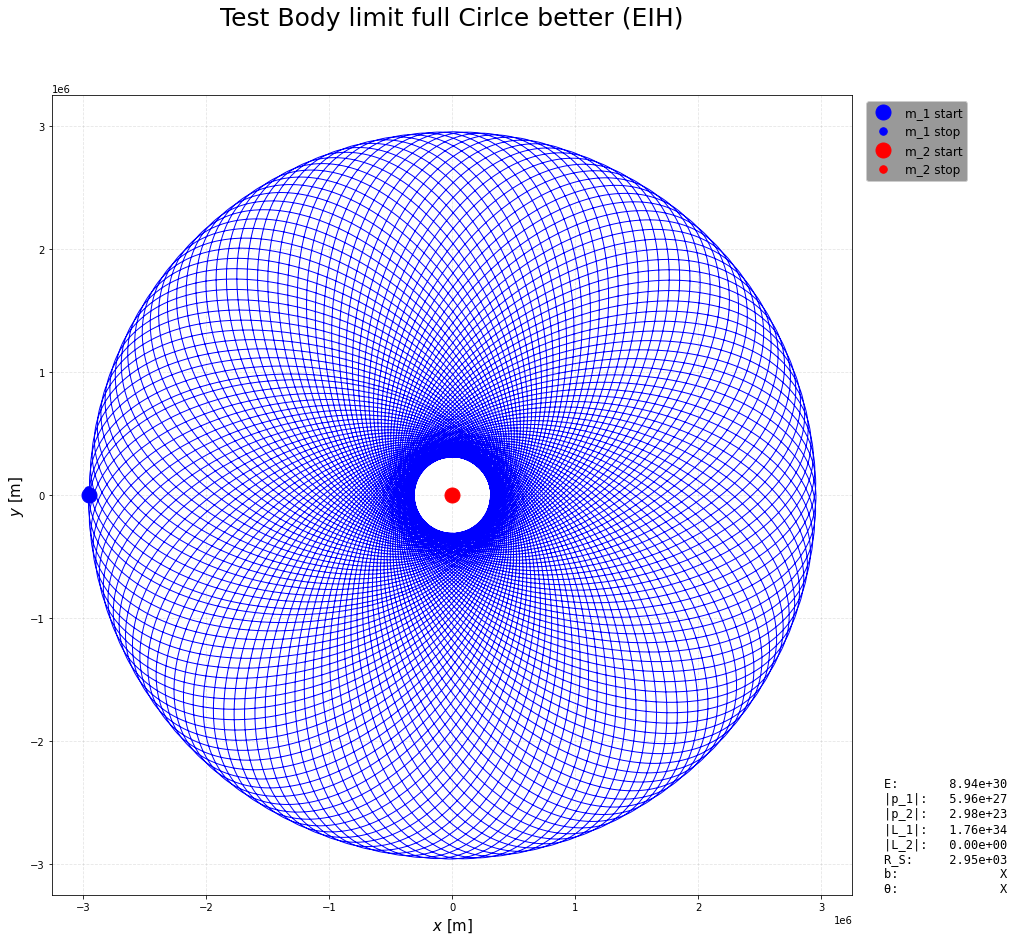

In [6]:
FullCircEIHData = np.genfromtxt("FullCircEIHData.csv", delimiter=',')
pos1FC, pos2FC, pos_CMFC = FullCircEIHData[0:2], FullCircEIHData[2:4], FullCircEIHData[4:6]

M = slice(0, int(1159.5*133), 10)
orbPlot1 = orbPlotter(pos1FC[:,M], pos2FC[:,M], pos_CMFC[:,M], parameters, filename = 'Test Body limit full Cirlce better (EIH)', show = True, save = True, figsize=(14,14))

#~5s

The number of peaks in a full 360 is 132.


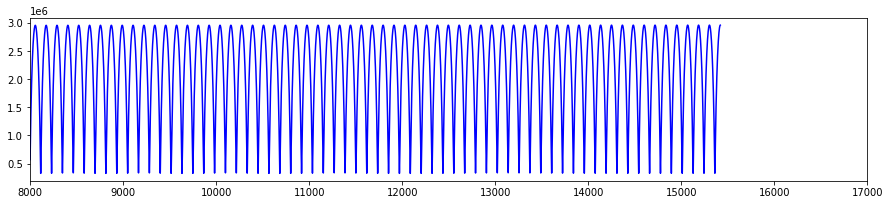

In [7]:
from scipy.signal import argrelextrema

# Compiling the distances at every point of the motion
Ls = np.sqrt(pos1FC[0,M]**2 + pos1FC[1,M]**2)

# Finding the number of peaks in the distances array
peaks = argrelextrema(Ls, np.less)[0]

# Adding one because the last peak is not counted
N = len(peaks)

print(f'The number of peaks in a full 360 is {N}.')
t = range(len(Ls[0:-1]))
fig, ax = plt.subplots(figsize=(15,3))
ax.set_xlim(8e3, 17e3)
ax.plot(t, Ls[0:-1], 'b')

#~1s




This actually fits almost perfectly with the analytically calculated 133 circle divisions.

To check whether the discrepancy in the semi-minor axis $\delta b \sim 10 \,R_S$ is due to the precession of the orbit 

In [8]:
r0 = 1000

ΔO = np.abs(r0 - a_N)* np.sin(Δφr)
Δb = ΔO/2
print(f'Δb = {Δb}')


Δb = 10.468098582630061


___
Earth-Sun System

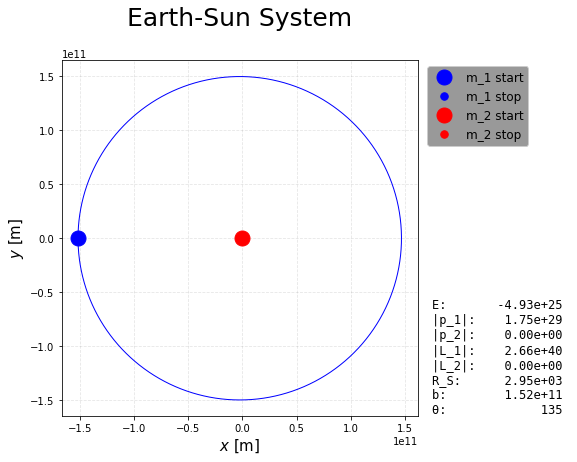

In [1]:
%run ./Functions_EIH.ipynb

m_1 = M_earth
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-152.100e9, 0])
x_2 = np.array([0.,         0])*R_S
v_1 = np.array([0.,   29.29e3])
v_2 = np.array([0.,         0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 3.2e12*R_S/c, dt = 1e9*R_S/c, mode = 'N')

orbPlotter(pos1, pos2, pos_CM, parameters, CM=False, filename='Earth-Sun System', show=False)

# 0.8s

Eccentricity Check $\displaystyle e = \sqrt{1 - \frac{b^2}{a^2}}$

In [10]:
pos1_CM = pos1 - pos_CM
xmax, xmin, ymax, ymin = findMaxPos(pos1_CM)

a = max(xmax - xmin, ymax - ymin)
b = min(xmax - xmin, ymax - ymin)

e = np.sqrt(1 - b**2/a**2)
print(f'a = {a:.3e} meter, b = {b:.3e} meter, e = {e:.3f}')

# ~1s

a = 2.992e+11 meter, b = 2.991e+11 meter, e = 0.017


We get $e_\mathrm{predicted} \approx 0.017$ which fits nicely with the expected value of $e_\mathrm{expected} \approx 0.017$.

___
Mercury-Sun System

In [11]:
%run ./Functions_EIH.ipynb

m_1 = 0.3301e24
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-69.818e9, 0.])
x_2 = np.array([0.,        0.])
v_1 = np.array([0.,   38.86e3])
v_2 = np.array([0.,         0])


s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 1e13*R_S/c, dt = 1e9*R_S/c, mode = 'EIH')
orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Mercury-Sun System', figsize=(9,9), show = False)
pos1, pos2, pos_CM, parameters = run_model(s, t_max = 1e13*R_S/c, dt = 1e9*R_S/c, mode = 'EIH', α=1e5)
orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Mercury-Sun System_α=1e5', figsize=(9,9), show = False)

# dt STABILIZED at 1e9*R_S/c
# ~10s

___
Icarus-Sun System

In [12]:
%run ./Functions_EIH.ipynb

m_1 = 0.001e15
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([1000., 0.])*R_S
x_2 = np.array([-1000.,0.])*R_S
v_1 = np.array([0.,  0.01])*c
v_2 = np.array([0.,     0])*c

s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 10000000*R_S/c, dt = 500*R_S/c, mode = 'EIH')

orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Icarus-Sun System',figsize=(9,9), show = False)



___
DatF bound case

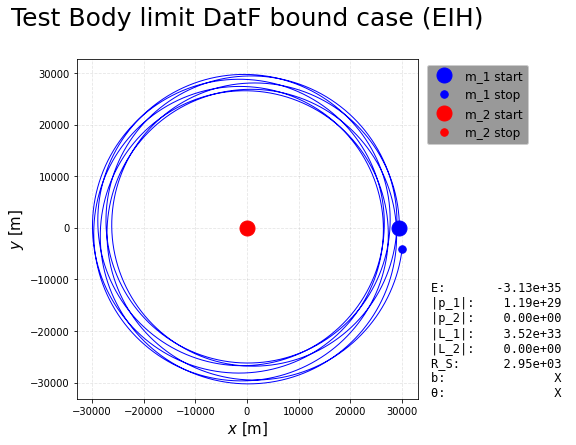

In [13]:
%run ./Functions_EIH.ipynb

s3 = [0,10,0.2,-0.25]

m_1 = 1e-9*M_sun
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([10.,  0.])*R_S
x_2 = np.array([0.,    0])*R_S
v_1 = np.array([0,   0.2])*c
v_2 = np.array([0.,    0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

# # pos1, pos2, pos_CM = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)
# pos1, pos2, pos_CM, parameters = run_model(s, t_max = 2000*R_S/c, dt = 0.1*R_S/c, mode = 'DatF')
# parameters[6:8] = 'X', 'X'
# orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Test Body limit DatF bound case (DatF)')

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 2000*R_S/c, dt = 0.1*R_S/c, mode = 'EIH')
parameters[6:8] = 'X', 'X'
orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Test Body limit DatF bound case (EIH)')
# lims = np.array([-2e6, 2.5e6])
# orbPlotter_lims(pos1, pos2, pos_CM, xlim=lims, ylim=lims, CM=True, filename='Test Body limit scattering 1')

# dt STABILIZED
# 4.8s

### Test Body limit SCATTERING

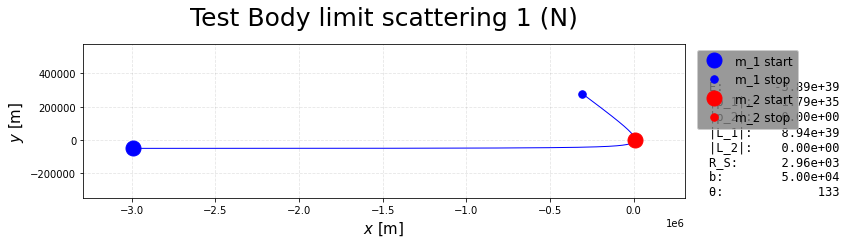

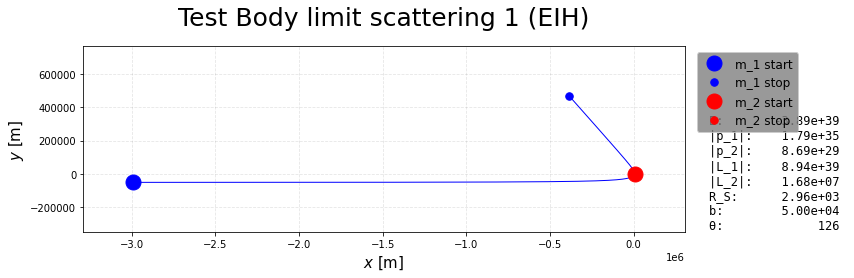

In [14]:
%run ./Functions_EIH.ipynb

m_1 = 0.003*M_sun
m_2 = 1*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-3e6, -5e4])
x_2 = np.array([0.,        0])
v_1 = np.array([0.1,       0])*c
v_2 = np.array([0.,        0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

# pos1, pos2, pos_CM, parameters = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)
pos1, pos2, pos_CM, parameters = run_model(s, t_max = 10000*R_S/c, dt = 1*R_S/c, mode = 'N')
orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, figsize=(12,12), filename='Test Body limit scattering 1 (N)')
pos1, pos2, pos_CM, parameters = run_model(s, t_max = 10000*R_S/c, dt = 1*R_S/c, mode = 'EIH')
orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, figsize=(12,12), filename='Test Body limit scattering 1 (EIH)')

# ~5s

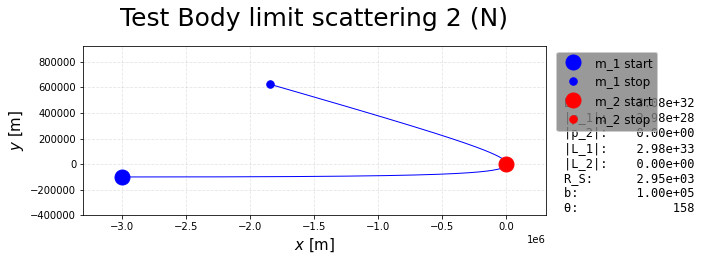

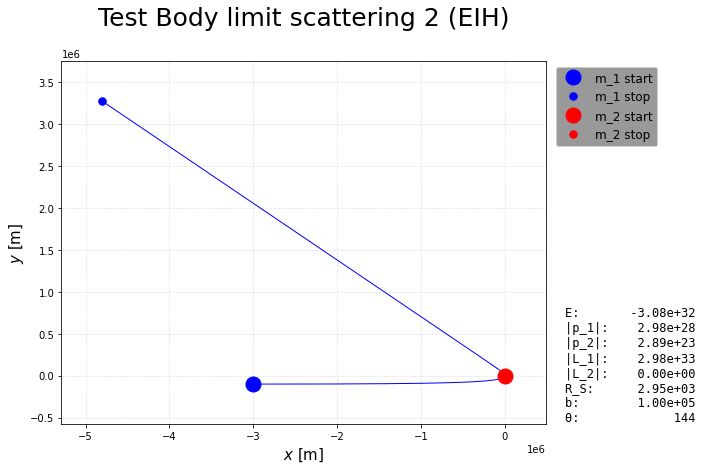

In [15]:
%run ./Functions_EIH.ipynb

m_1 = 1e-9*M_sun
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-3e6, -1e5])
x_2 = np.array([0.,        0])
v_1 = np.array([0.05,       0])*c
v_2 = np.array([0.,        0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 25000*R_S/c, dt = 1*R_S/c, mode = 'N')
orbPlotter(pos1, pos2, pos_CM, parameters, CM=False, figsize=(10,10), filename='Test Body limit scattering 2 (N)')

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 25000*R_S/c, dt = 1*R_S/c, mode = 'EIH')
orbPlotter(pos1, pos2, pos_CM, parameters, CM=False, figsize=(10,10), filename='Test Body limit scattering 2 (EIH)')
# lims = np.array([-2e6, 2e6])
# orbPlotter_lims(pos1, pos2, pos_CM, parameters, xlim=lims, ylim=lims, CM=True, filename='Test Body limit scattering 2')

# dt STABILIZED at dt = 1*R_S/c with t_max = 25000*R_S/c
# ~5s

___
DatF scattering case

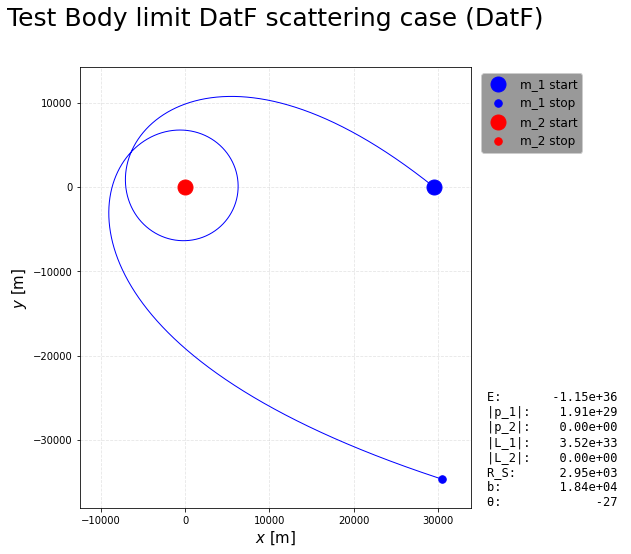

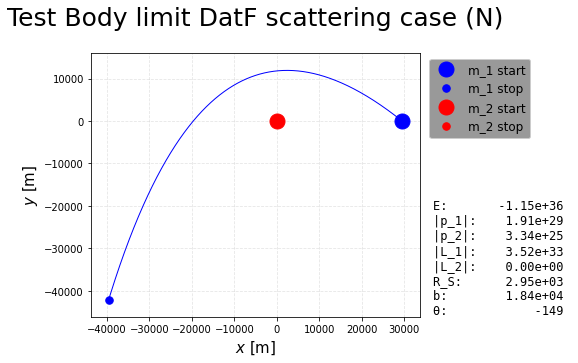

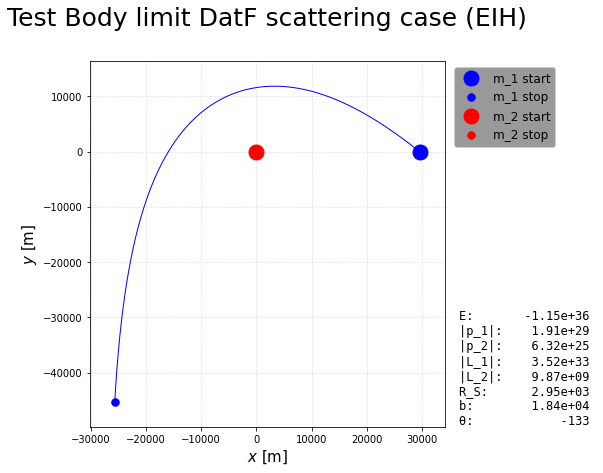

In [16]:
s3 = [0,10,0.2,-0.25]

m_1 = 1e-9*M_sun
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([10.,    0.])*R_S
x_2 = np.array([0.,      0])*R_S
v_1 = np.array([-0.25, 0.2])*c
v_2 = np.array([0.,      0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 100*R_S/c, dt = 0.01*R_S/c, mode = 'DatF')
orbPlotter(pos1, pos2, pos_CM, parameters, filename='Test Body limit DatF scattering case (DatF)')

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 100*R_S/c, dt = 0.01*R_S/c, mode = 'N')
orbPlotter(pos1, pos2, pos_CM, parameters, filename='Test Body limit DatF scattering case (N)')

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 100*R_S/c, dt = 0.01*R_S/c, mode = 'EIH')
orbPlotter(pos1, pos2, pos_CM, parameters, filename='Test Body limit DatF scattering case (EIH)')
# lims = np.array([-2e6, 2.5e6])
# orbPlotter_lims(pos1, pos2, pos_CM, parameters, xlim=lims, ylim=lims, CM=True, filename='Test Body limit scattering 1')

# dt STABILIZED at 0.01*R_S/c with t_max = 100*R_S/c
# ~5s

# BLACK HOLE REGIME CHECK $\quad m \sim 10M_\mathrm{sun}$

In [17]:
%run ./Functions_EIH.ipynb
c = const.c.value
G = const.G.value
M_sun = const.M_sun.value

## SYMMETRY TEST

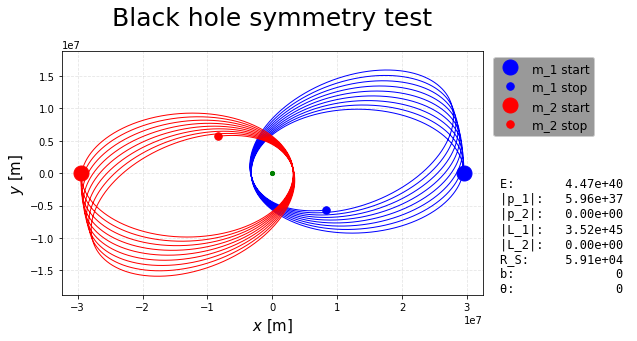

In [18]:
%run ./Functions_EIH.ipynb

m_1 = M_sun*10
m_2 = M_sun*10

R_S = findR_S(m_1, m_2)

x_1 = np.array([1e3,  0.0])*R_S
x_2 = np.array([0.0,  0.0])*R_S
v_1 = np.array([0.0, 0.01])*c
v_2 = np.array([0.0,   0.])*c

s = x_1, x_2, v_1, v_2, m_1, m_2

t_max = 1e6*R_S/c

pos1, pos2, posCM, parameters = run_model(s, t_max = t_max, dt=t_max/5e5, mode = 'EIH')
# pos1, pos2, posCM, parameters = run_model(s, t_max = 5e3, dt=1, mode = 'EIH')
parameters[6:8] = 0,0
orbPlotter(pos1, pos2, posCM, parameters, CM = True, filename='Black hole symmetry test', figsize=(9,9))

# ~1m

## Checking the Periastron Precession
We'll test whether the periastron precession of the above situation fits with analytical predictions.

We'll be using Robertson's formula for the periastron precession

$$\Delta \varphi = 6 \pi \frac{G(m_1 + m_2)}{a c^2 (1- e^2)} \qquad \longleftrightarrow \qquad \Delta \tilde \varphi = 6 \pi \frac{(\tilde m_1 + \tilde m_2)}{\tilde a (1- e^2)}$$

First we have measure the parameters of the quasi-Newtonian orbits

In [19]:
pos1t = pos1 - posCM
pos2t = pos2 - posCM
posCMt = np.zeros_like(posCM)

a = 16390023.2 b = 9552056.3 e = 0.813


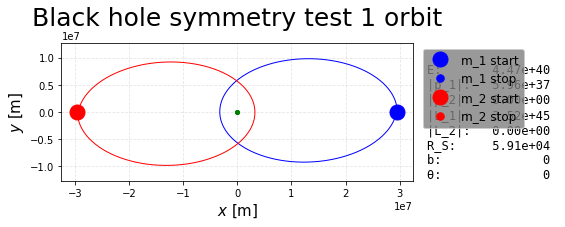

In [20]:
M = slice(0, int(len(pos1[0])/9))

orbPlotter(pos1t[:,M], pos2t[:,M], posCMt[:,M], parameters, filename='Black hole symmetry test 1 orbit', figsize=(8,8))

Δx = (max(pos1t[0,M]) - min(pos1t[0,M]))/2
Δy = (max(pos1t[1,M]) - min(pos1t[1,M]))/2
a = max(Δx, Δy)
b = min(Δx, Δy)

e = np.sqrt(1 - b**2/a**2)

print(f'a = {a:.1f}', f'b = {b:.1f}', f'e = {e:.3f}')


Our analytical prediction of $\Delta \varphi$ is then

In [21]:
Δφ_an = 6*np.pi*G*(m_1 + m_2)/(a*c**2*(1-e**2))
print(f'Δφ_an = {Δφ_an:.3f} radians = {(Δφ_an*np.pi/180):.2e} angles')

Δφ_an = 0.100 radians = 1.75e-03 angles


Now we find the precession of our simulated case

Δφ_code = 0.042 radians = 7.26e-04 angles
δφ = 0.058


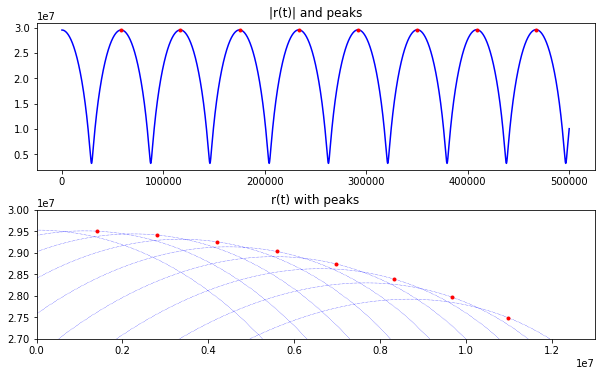

In [22]:
from scipy.signal import argrelextrema

# Making an array of distances to the center of mass for the first mass over time r_1cm(t)
Ls = np.sqrt(pos1t[0,:]**2 + pos1t[1,:]**2)
t = range(len(Ls))

# Finding the indices of the greatest distance 
maxis = argrelextrema(Ls, np.greater, order=8)[0]

#Finding the acutal distances from 0,0 of the peaks
peakposs = pos1t[:,maxis]
peakdists = np.sqrt(peakposs[0,:]**2 + peakposs[1,:]**2)

#plotting
fig,(ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax1.set_title('|r(t)| and peaks')
ax1.plot(t, Ls, 'b-')
ax1.plot(maxis, peakdists, 'ro', markersize=3)
ax1.set_aspect('0.005')
ax2.set_title('r(t) with peaks')
ax2.plot(pos1t[1], pos1t[0], 'b:', lw=0.5)
ax2.plot(peakposs[1], peakposs[0], 'ro', markersize=3)
ax2.set_xlim(0, 1.3e7)
ax2.set_ylim(2.7e7, 3e7)
ax2.set_aspect('1')

#Finding the distance between each peak (i) and the next (i+1)
dist = np.zeros(len(peakposs[0]))
for i in range(len(peakposs[0]) - 1):
    line = peakposs[:,i] - peakposs[:,i+1]
    d = np.linalg.norm(line)
    dist[i] = d

Δφ_code = np.mean(dist)/np.mean(peakdists)
print(f'Δφ_code = {Δφ_code:.3f} radians = {(Δφ_code*np.pi/180):.2e} angles')

δφ = np.abs(Δφ_an - Δφ_code)
print(f'δφ = {δφ:.3f}')


## BOUND CASE

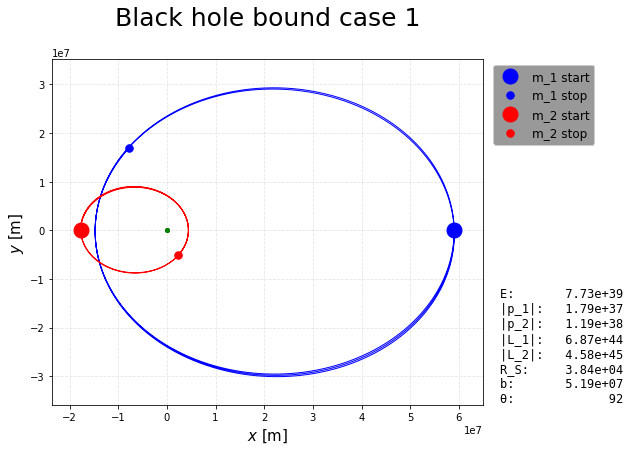

In [23]:
m_1 = 3*M_sun
m_2 = 10*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([1000.,  0.])*R_S
x_2 = np.array([-1000., 0.])*R_S
v_1 = np.array([0,   0.01])*c
v_2 = np.array([0.,  0.02])*c


s = x_1, x_2, v_1, v_2, m_1, m_2

# pos1, pos2, pos_CM, parameters = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)
pos1, pos2, pos_CM, parameters = run_model(s, t_max = 1000000*R_S/c, dt = 50*R_S/c, mode = 'EIH')

orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Black hole bound case 1', figsize=(9,9))
# lims = (-2e7, 2e7)
# orbPlotter_lims(pos1, pos2, pos_CM, parameters, xlim=lims, ylim=lims, CM=True, filename='Black hole bound case 1', figsize=(9,9))

# 1m 22.1s

# BLACK HOLE SCATTERING

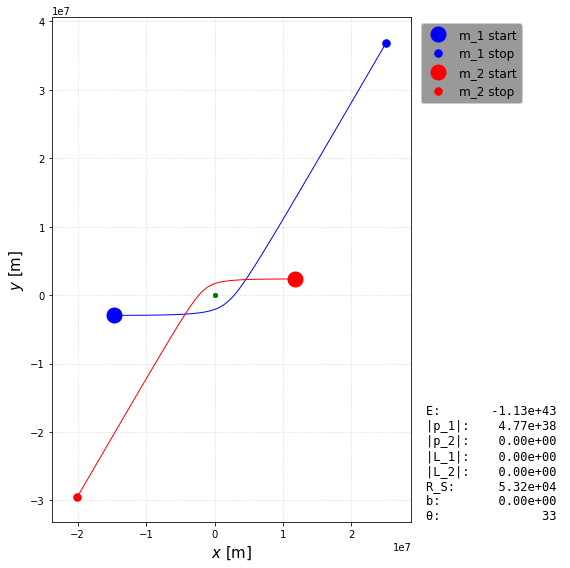

In [24]:
m_1 = 8*M_sun
m_2 = 10*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-500,  0.])*R_S
x_2 = np.array([0.,  100.])*R_S
v_1 = np.array([0.1,   0])*c
v_2 = np.array([0.,     0])*c


s = x_1, x_2, v_1, v_2, m_1, m_2

# pos1, pos2, pos_CM, parameters = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)
pos1, pos2, pos_CM, parameters = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, mode = 'EIH')

orbPlotter(pos1, pos2, pos_CM, parameters, CM=True)
# lims = (-2e7, 2e7)
# orbPlotter_lims(pos1, pos2, pos_CM, parameters, xlim=lims, ylim=lims, CM=True, filename='Black hole scattering 1', figsize=(8,8))

# ~5s

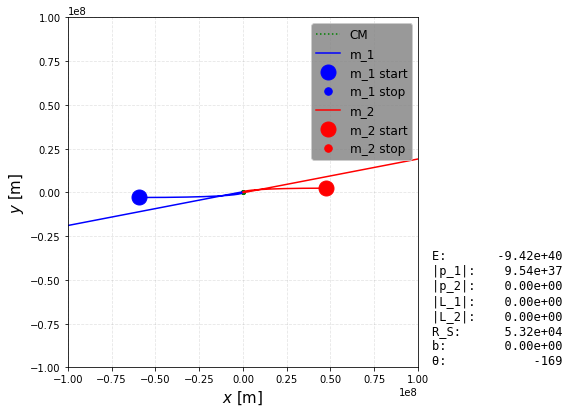

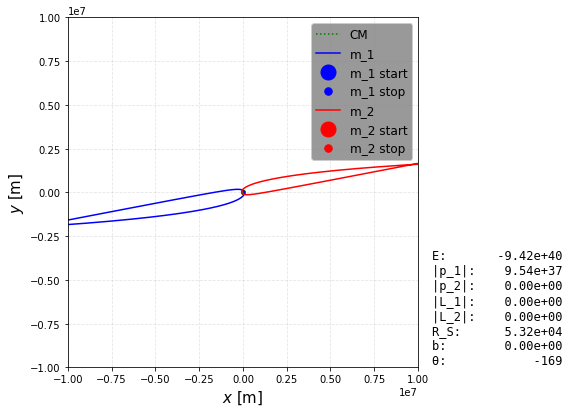

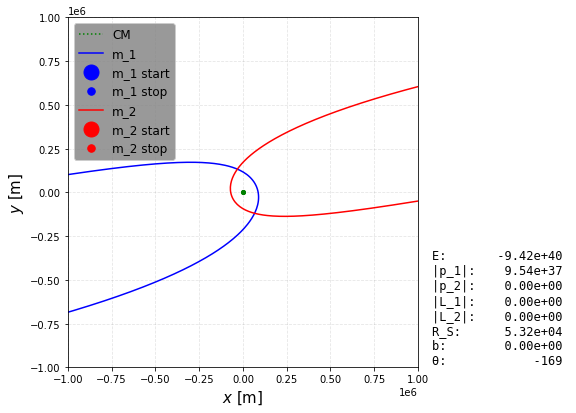

In [25]:
m_1 = 8*M_sun
m_2 = 10*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-2e3,  0.])*R_S
x_2 = np.array([0.,  100.])*R_S
v_1 = np.array([0.02,   0])*c
v_2 = np.array([0.,     0])*c


s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 100000*R_S/c, dt = 1*R_S/c, mode = 'EIH')

# orbPlotter(pos1, pos2, pos_CM, parameters, CM=True)
limss = np.array([(-1e8, 1e8), (-1e7, 1e7), (-1e6, 1e6)])
for i in limss:
    orbPlotter_lims(pos1, pos2, pos_CM, xlim=i, ylim=i, CM=True)

# 9.2s